# G2M insight for Cab Investment firm

# Data Description and Source
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Data Source
Link: https://github.com/DataGlacier/DataSets

Data Set:

The dataset contain 4 individual dataset for the period of 31/01/2016 to 31/12/2018.


Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies, the following are the list of varaibles in the Cab dataset.

*   Transaction ID
*   Date of Travel
*   Company
*   City
*   Kilometer Travelled
*   Price Changed
*   Cost of Trip  

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details. The following variables are in the table

*   Customer ID
*   Gender
*   Age
*   Income(USD/Month)

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode
* Transaction ID 
* Customer ID     
* Payment_Mode

**City.csv** – this file contains list of US cities, their population and number of cab users
* City
* Population 
* Users   

**Research Question/Hypothesis:**
* What are the contributing factors to the profit made over the years?
* Is there any significant difference between the profit made by the two companies?
* Is there any significant difference between methods of payment by revenue generated?
* Is there any relationship between cities' population and the profit made?
* Is there any relationship between the kilometer covered by the two companies?
* Is there any significant difference in the price charged by cities?
* What is the yearly trend of the profit margin?

# Data Importation and Cleaning

In [1]:
## Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
## Importing the datasets
df_cab = pd.read_csv('/Users/sukuratsalam/Downloads/Data Glacier/DataSets-main/Cab_Data.csv')
df_transaction = pd.read_csv('/Users/sukuratsalam/Downloads/Data Glacier/DataSets-main/Transaction_ID.csv')
df_customer = pd.read_csv('/Users/sukuratsalam/Downloads/Data Glacier/DataSets-main/Customer_ID.csv')
df_city = pd.read_csv('/Users/sukuratsalam/Downloads/Data Glacier/DataSets-main/City.csv')


### Checking for the structure of each dataset

In [3]:
### CAB Dataset
#checking for the info
df_cab.info()
df_cab.head(10)


#Checking the unique values
dict = {}
for i in list(df_cab.columns):
    dict[i] = df_cab[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,unique count
Transaction ID,359392
Date of Travel,1095
Company,2
City,19
KM Travelled,874
Price Charged,99176
Cost of Trip,16291


In [4]:
#Checking the first 10 rows
df_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [5]:
### City Dataset
#checking for the info
df_city.info()
df_city.head(10)


#Checking the unique values
dict = {}
for i in list(df_city.columns):
    dict[i] = df_city[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


,unique count
City,20
Population,20
Users,20


In [6]:
#Checking the first 10 rows
df_city.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
### Customer ID Dataset
#checking for the info
df_customer.info()
df_customer.head(10)


#Checking the unique values
dict = {}
for i in list(df_customer.columns):
    dict[i] = df_customer[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,unique count
Customer ID,49171
Gender,2
Age,48
Income (USD/Month),23341


In [8]:
#Checking the first 10 rows
df_customer.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [9]:
### Transaction ID Dataset
#checking for the info
df_transaction.info()
df_transaction.head(10)


#Checking the unique values
dict = {}
for i in list(df_transaction.columns):
    dict[i] = df_transaction[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,unique count
Transaction ID,440098
Customer ID,49171
Payment_Mode,2


In [10]:
#Checking the first 10 rows
df_transaction.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


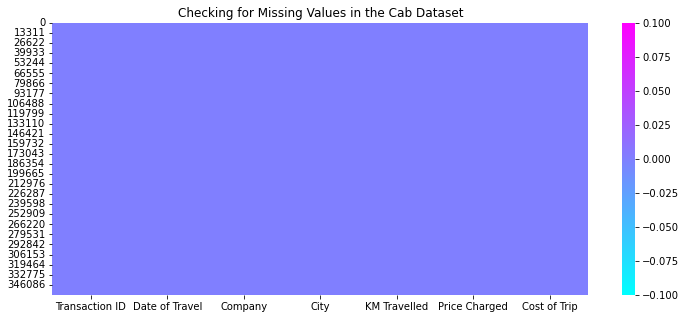

In [11]:
##Checking for missing values
plt.figure(figsize=(12,5))
sns.heatmap(df_cab.isnull(), cmap='cool')
plt.title('Checking for Missing Values in the Cab Dataset')
plt.show()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


<AxesSubplot:ylabel='Type'>

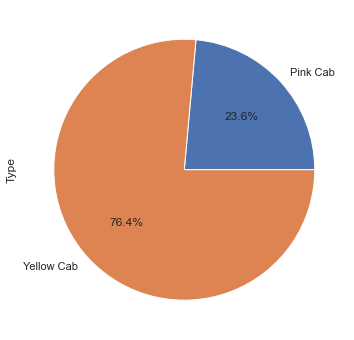

In [95]:
## Counts of Categorical Variables
print(df_cab["Company"].value_counts())
plt.figure(figsize=(8, 6))
df_cab.groupby('Company').size().plot(kind='pie',
                                       y = "Company",
                                       label = "Type",
                                       autopct='%1.1f%%')



<!-- This is a comment -->
The above pie chat shows that we 76.4% of the total transaction goes to yellow cab users and 23.6% of the total transaction goes to pink cab users

In [13]:
## Printing the count of City
print(df_cab["City"].value_counts())

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64


In [14]:
# Converting Date of Travel to datTime format
df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'], unit='D', origin='1899-12-30')

In [15]:

df_cab.tail(6)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359386,10440100,2018-01-07,Yellow Cab,WASHINGTON DC,28.71,452.19,351.4104
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


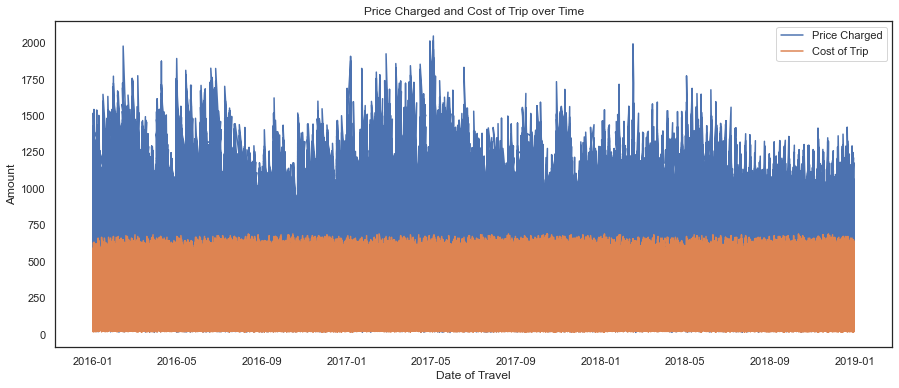

In [16]:
# time plot for Date travel against  Price charged and Cost of Trip
plt.figure(figsize=(15, 6))
sns.set(style="white")
plt.plot(df_cab['Date of Travel'], df_cab['Price Charged'], label='Price Charged')
plt.plot(df_cab['Date of Travel'], df_cab['Cost of Trip'], label='Cost of Trip')
plt.xlabel('Date of Travel')
plt.ylabel('Amount')
plt.title('Price Charged and Cost of Trip over Time')
plt.legend()
plt.show()

# Data Processing

In [74]:
# Mereging the 4 datasets based on the unique variables
merged_df1 = pd.merge(df_cab, df_transaction, on='Transaction ID')
merged_df2 = pd.merge(merged_df1, df_customer, on='Customer ID')
merged_df = pd.merge(merged_df2, df_city, on='City')

In [75]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [76]:
# checking for missing values in the merged dataframe
Miss = merged_df.isnull().sum()
Miss_df = pd.DataFrame(Miss, index=Miss.index)
print(Miss_df)

                    0
Transaction ID      0
Date of Travel      0
Company             0
City                0
KM Travelled        0
Price Charged       0
Cost of Trip        0
Customer ID         0
Payment_Mode        0
Gender              0
Age                 0
Income (USD/Month)  0
Population          0
Users               0


In [77]:
# Checking the number of uniques values for each variables

dict = {}
for i in list(merged_df.columns):
    dict[i] = merged_df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Transaction ID,359392
Date of Travel,1095
Company,2
City,19
KM Travelled,874
Price Charged,99176
Cost of Trip,16291
Customer ID,46148
Payment_Mode,2
Gender,2


In [21]:
## Dropping the Transaction_ID and Customer_ID column
## This is because we cannot perform any analysis on them as they are just identifiers
#merged_df.drop(["Transaction ID", "Customer ID"], axis=1, inplace=True)


In [78]:
#Creating a new column for profit
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']

In [79]:
# converting Population and Users column to numeric value
merged_df['Population'] = merged_df['Population'].str.replace(',', '').astype(int)
merged_df['Users'] = merged_df['Users'].str.replace(',', '').astype(int)

In [80]:
merged_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,50.8912
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701,25.0960
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701,118.9736


Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


<AxesSubplot:ylabel='Type'>

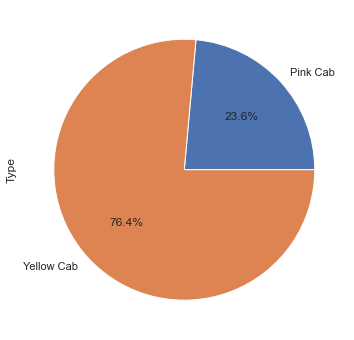

In [81]:
## Counts of Categorical Variables
print(merged_df["Company"].value_counts())
plt.figure(figsize=(8, 6))
merged_df.groupby('Company').size().plot(kind='pie',
                                       y = "Company",
                                       label = "Type",
                                       autopct='%1.1f%%')



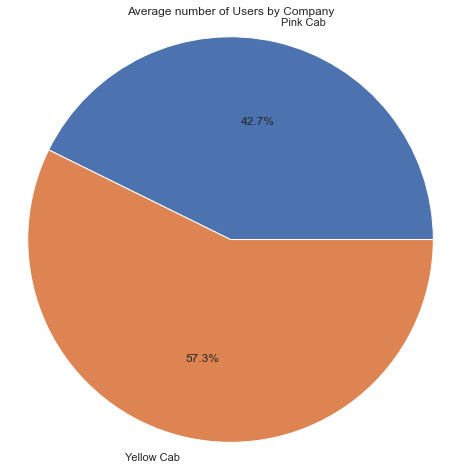

In [82]:
users_by_company = merged_df.groupby('Company')['Users'].mean()
plt.figure(figsize=(8, 8))
plt.pie(users_by_company, labels=users_by_company.index, autopct='%1.1f%%')
plt.title('Average number of Users by Company')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


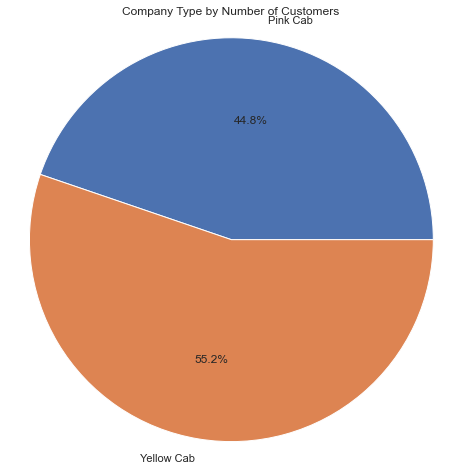

In [94]:
customer_counts = merged_df.groupby('Company')['Customer ID'].nunique()
print(customer_counts)
plt.figure(figsize=(8, 8))
plt.title('Company Type by Number of Customers')

plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


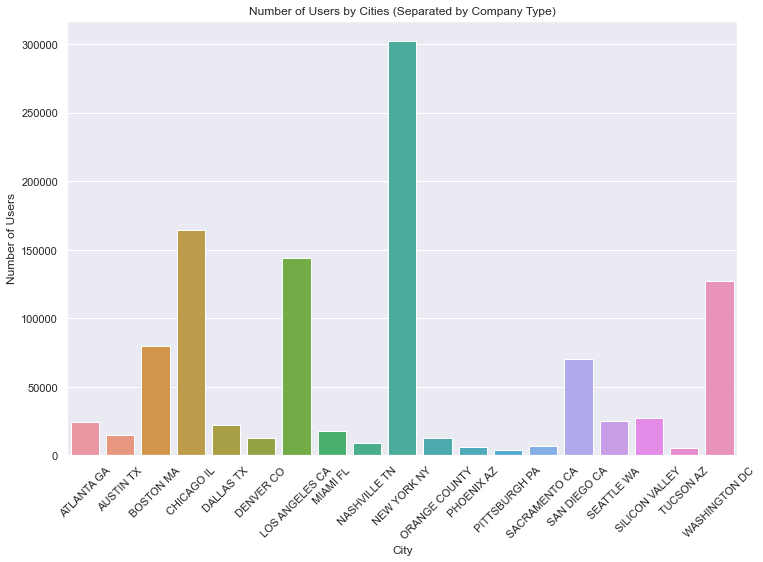

In [93]:
plt.figure(figsize=(12, 8))
plt.title('Number of Users by Cities (Separated by Company Type)')

sns.barplot(data=merged_df, x='City', y='Users')

plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

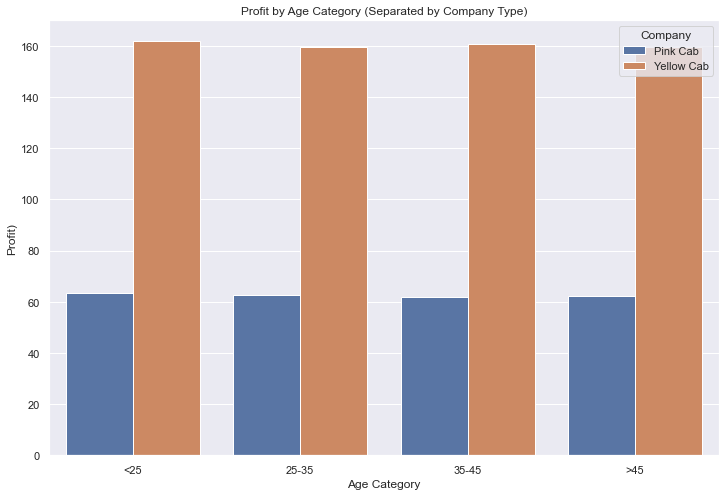

In [73]:
#Define the age categories
age_bins = [0, 25, 35, 45, float('inf')]
age_labels = ['<25', '25-35', '35-45', '>45']

# create Column Age category to Categorize age into age categories
merged_df['Age Category'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False)

#Calculating the average income of each age categories
average_income = merged_df.groupby(['Age Category', 'Company'])['Profit'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.title('Profit by Age Category (Separated by Company Type)')

sns.barplot(data=average_income, x='Age Category', y='Profit', hue='Company')

plt.xlabel('Age Category')
plt.ylabel('Profit)')

plt.show()


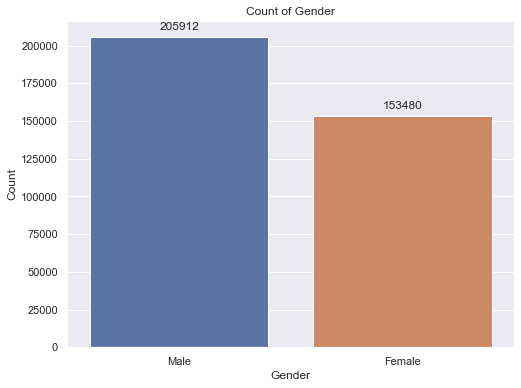

In [61]:
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data= merged_df, x='Gender')

# Add count labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')

# Show the plot
plt.show()

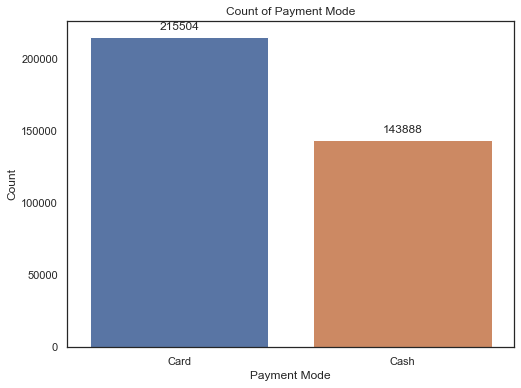

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data= merged_df, x='Payment_Mode')

# Add count labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Add labels and title
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Count of Payment Mode')

# Show the plot
plt.show()

In [28]:
#Seperating the categorical Numeric Variables

Num_column = ['KM Travelled','Price Charged', 'Cost of Trip','Profit', 'Users', 'Population','Income (USD/Month)','Age']

In [29]:
#Checking the descriptions of the numeric varables
merged_df[Num_column].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.90,12.0000,22.440,3.296000e+01,48.000
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.60,206.4375,386.360,5.836600e+02,2048.030
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.00,151.2000,282.480,4.136832e+02,691.200
Profit,359392.0,1.372532e+02,1.603118e+02,-220.06,28.0120,81.962,1.900300e+02,1463.966
Users,359392.0,1.583656e+05,1.008501e+05,3643.00,80021.0000,144132.000,3.021490e+05,302149.000
Population,359392.0,3.132198e+06,3.315194e+06,248968.00,671238.0000,1595037.000,8.405837e+06,8405837.000
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.00,8424.0000,14685.000,2.103500e+04,35000.000
Age,359392.0,3.533670e+01,1.259423e+01,18.00,25.0000,33.000,4.200000e+01,65.000


# Data Visualiziation

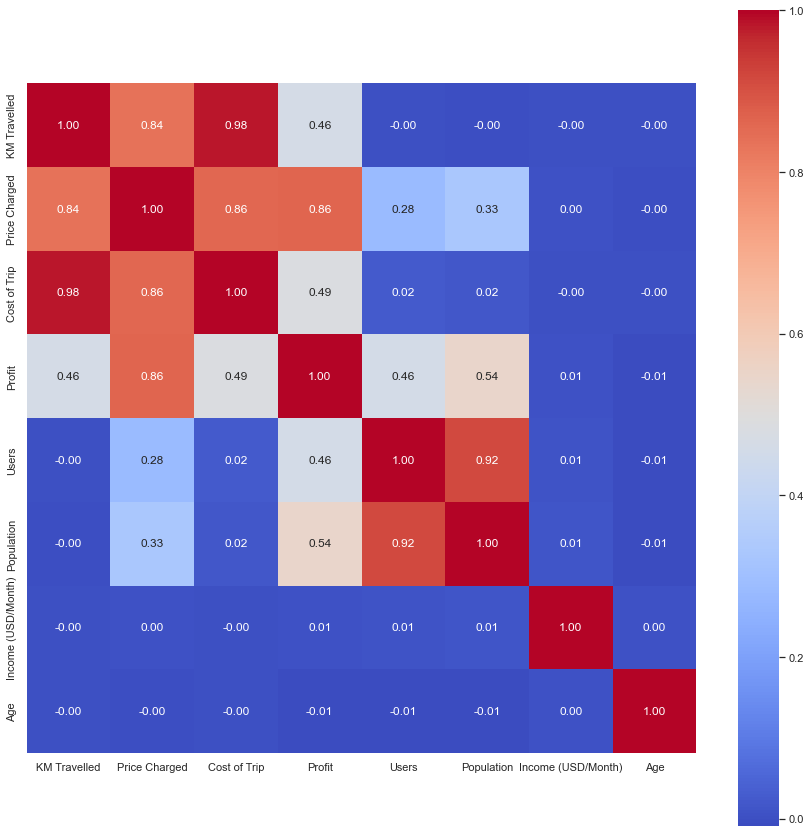

In [30]:
# Checking the relationship of the numerics varialbs using correlation matrics
corr_matrix = merged_df[Num_column].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()


<!-- This is a comment -->
The above heatmap shows the relationship between each of the numerical variables in the overall merged dataset.
Checking for the variables that are highly correlated with the profit margin,
* It was observed that the price charged is highly positively correlated with the value 0.86, which implies that the higher the price charged the more the profit.
* Also the population of a city has a significant relationship with the profit of 0.54, which indicates that the higher the population of a city the more the profit  
* The Users, Cost of trip, and KM traveled also have a positive relationship with the profit margin.
* In general the orange colour represents a significant positive relationship while the darker shade of blue indicates an insignificant relationship.  

<AxesSubplot:xlabel='Company', ylabel='KM Travelled'>

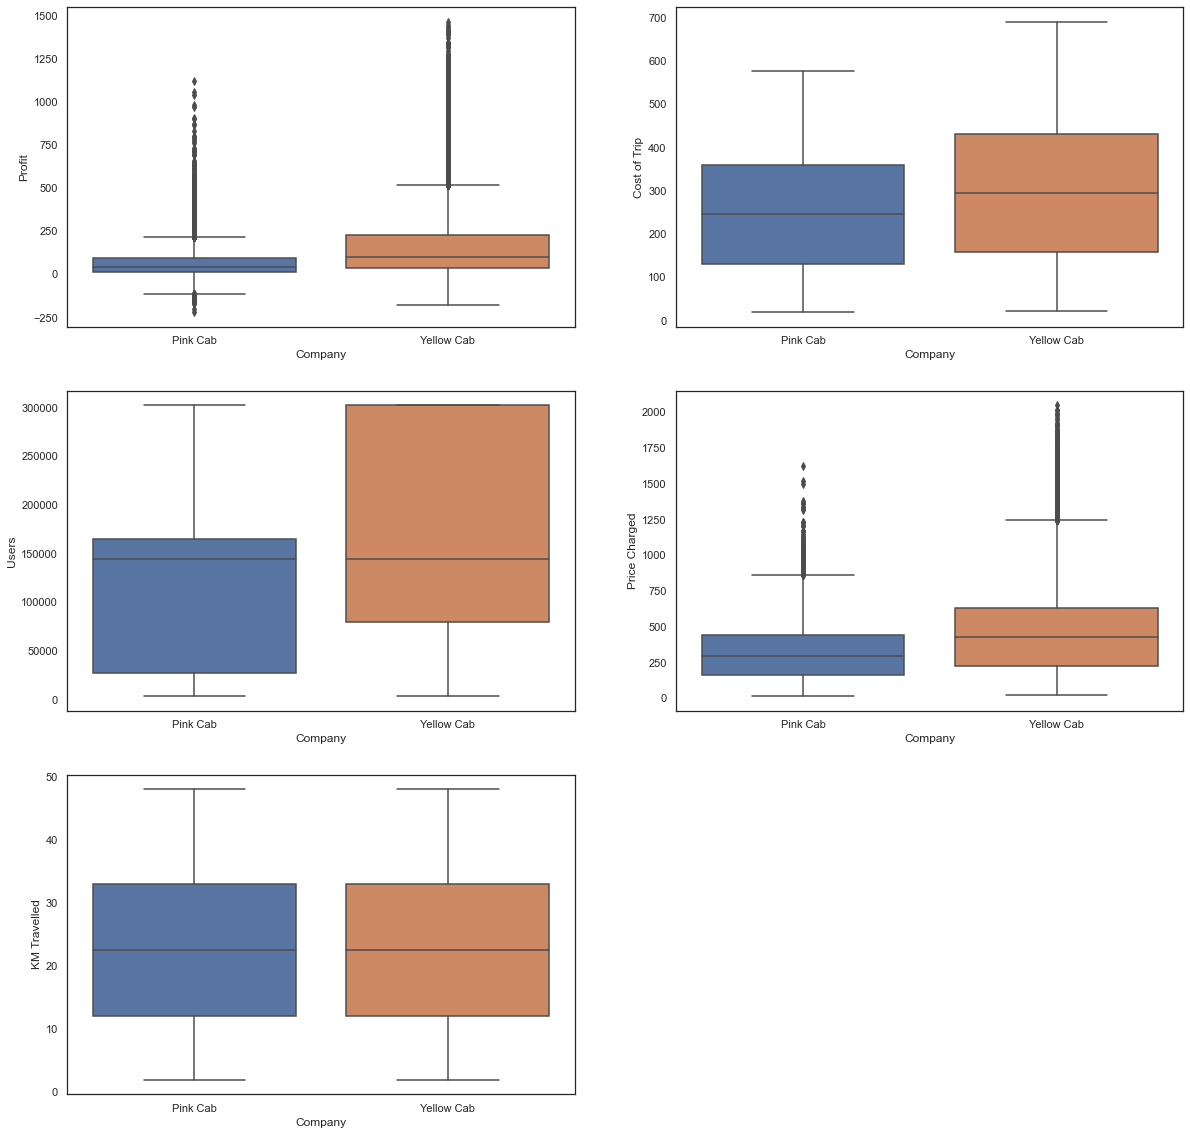

In [31]:
# Visualizing the company by the profit made
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(x = merged_df['Company'], y = merged_df['Profit'])

plt.subplot(3,2,2)
sns.boxplot(x = merged_df['Company'], y = merged_df['Cost of Trip'])

plt.subplot(3,2,3)
sns.boxplot(x = merged_df['Company'], y = merged_df['Users'])

plt.subplot(3,2,4)
sns.boxplot(x = merged_df['Company'], y = merged_df['Price Charged'])

plt.subplot(3,2,5)
sns.boxplot(x = merged_df['Company'], y = merged_df['KM Travelled'])



<!-- This is a comment -->
From the above boxplots, the following was observed:
* Yellow cabs company made more profit than the pink cab company and some extreme values were observed for both companies.
* The cost of the trip of the yellow cab is higher than that of the pink cab which implies that the yellow cab company charged more that the pink cab.
* Yellow cab users are more than the pink cab users
* The KM traveled by the two companies is the same.



<function matplotlib.pyplot.show(close=None, block=None)>

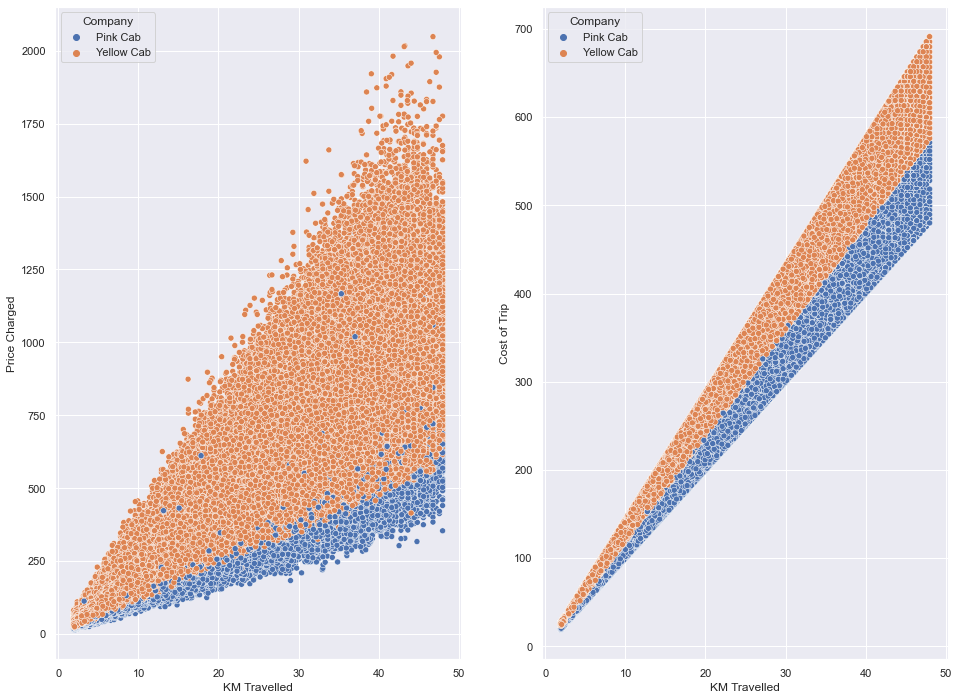

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 12))

plt.subplot(1,2,1)
sns.scatterplot(data=merged_df, x='KM Travelled', y='Price Charged', hue='Company')

plt.subplot(1,2,2)
sns.scatterplot(data=merged_df, x='KM Travelled', y='Cost of Trip', hue='Company')
plt.show

<!-- This is a comment -->
The scatter plot above also confirms that the yellow cab charged higher than the pink bus.

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

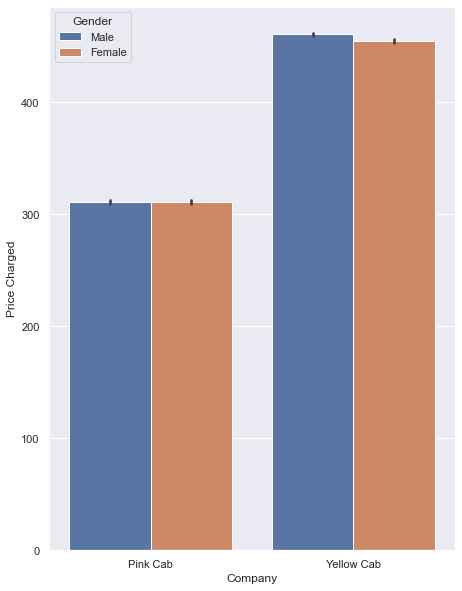

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))

plt.subplot(1,2,1)
sns.barplot(data=merged_df, x='Company',y ='Price Charged' , hue='Gender')

#plt.subplot(1,2,2)
#sns.barplot(data=merged_df, x='Payment_Mode',y ="Profit" hue='Company')

#plt.show()



<!-- This is a comment -->
From the multiple bar charts above, the pink cab charged the same amount for both gender while the yellow cab male user was slightly higher than the female.

<AxesSubplot:title={'center':'Average Profit by Month'}, xlabel='Month', ylabel='Profit'>

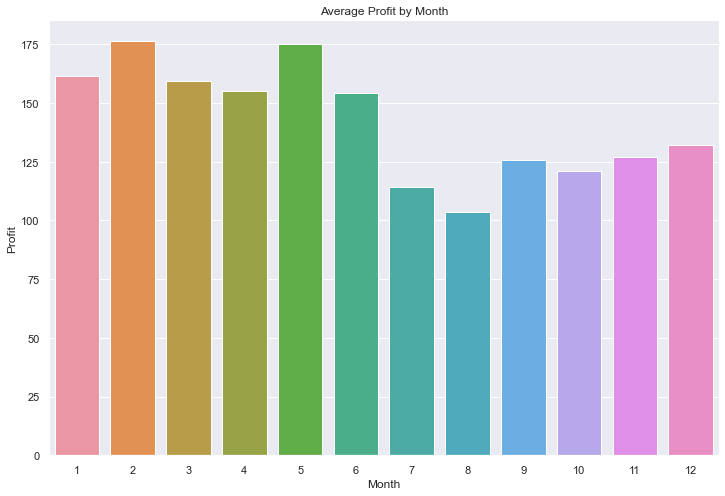

In [34]:
# Assuming 'df' is your DataFrame containing the date and profit columns
merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'])  # Convert 'Date' column to datetime if it's not already
merged_df['Month'] = merged_df['Date of Travel'].dt.month  # Extract the month from the 'Date' column

# Group the data by month and calculate the average profit
monthly_avg_profit = merged_df.groupby('Month')['Profit'].mean().reset_index()

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
plt.title('Average Profit by Month')
sns.barplot(data=monthly_avg_profit, x='Month', y='Profit')

<!-- This is a comment -->
The above bar chart shows that more profits were made during the months when the weather is favorable. 

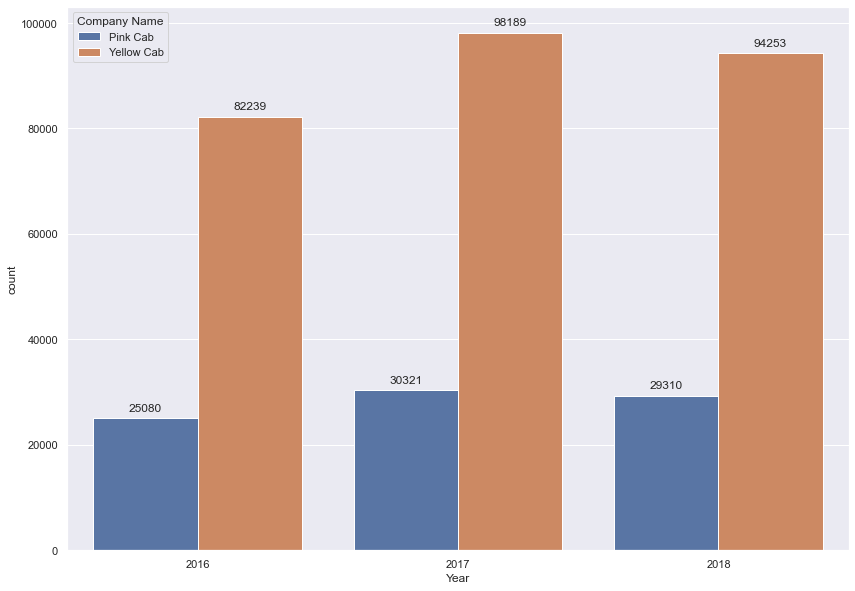

In [70]:
merged_df['Year'] = pd.to_datetime(merged_df['Date of Travel']).dt.year

sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
ax = sns.countplot(data=merged_df, x='Year', hue='Company')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend(title='Company Name')

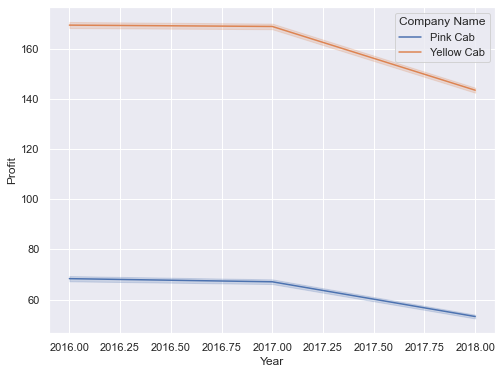

In [36]:
merged_df['Year'] = pd.to_datetime(merged_df['Date of Travel']).dt.year

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=merged_df, x='Year', y='Profit', hue='Company')

plt.legend(title='Company Name')

<AxesSubplot:title={'center':'Average Profit by Month'}, xlabel='Month', ylabel='Profit'>

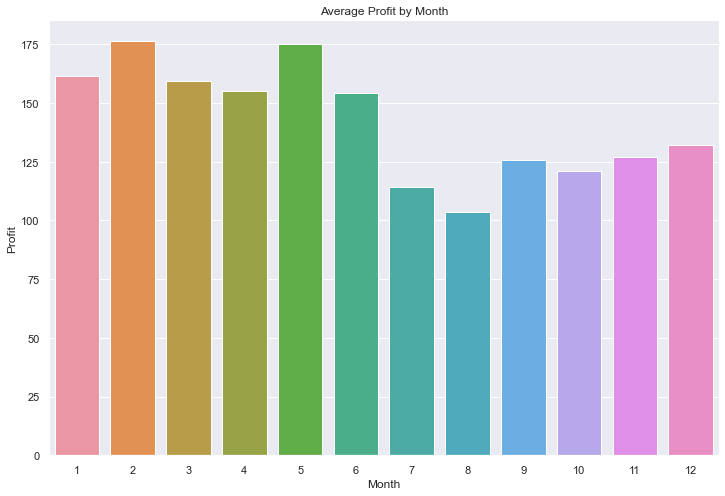

In [37]:
# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
plt.title('Average Profit by Month')
sns.barplot(data=monthly_avg_profit, x='Month', y='Profit')

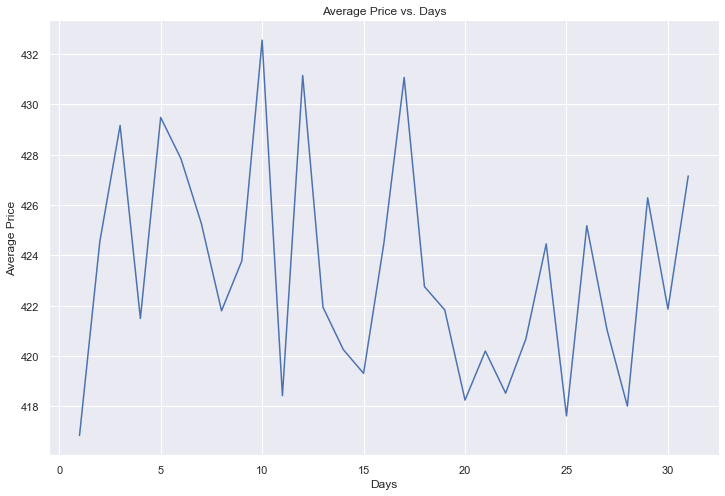

In [38]:
merged_df['Day'] = merged_df['Date of Travel'].dt.day
average_price = merged_df.groupby('Day')['Price Charged'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_price.index, average_price.values)
plt.xlabel('Days')
plt.ylabel('Average Price')
plt.title('Average Price vs. Days')
plt.show()

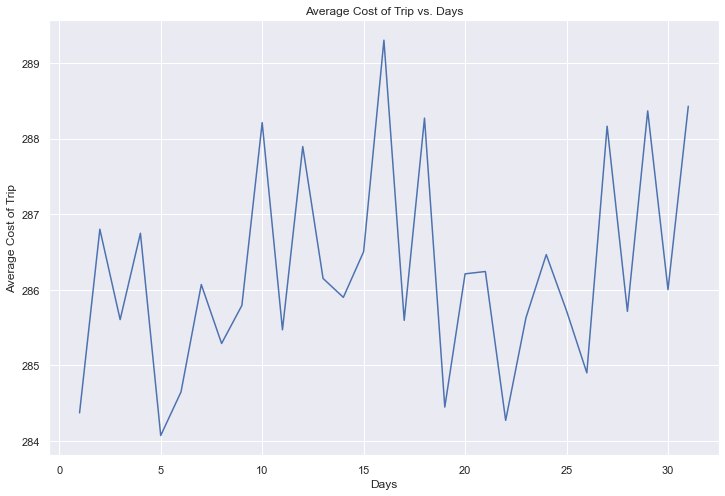

In [39]:
merged_df['Day'] = merged_df['Date of Travel'].dt.day
average_cost = merged_df.groupby('Day')['Cost of Trip'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_cost.index, average_cost.values)

plt.xlabel('Days')
plt.ylabel('Average Cost of Trip')
plt.title('Average Cost of Trip vs. Days')
plt.show()

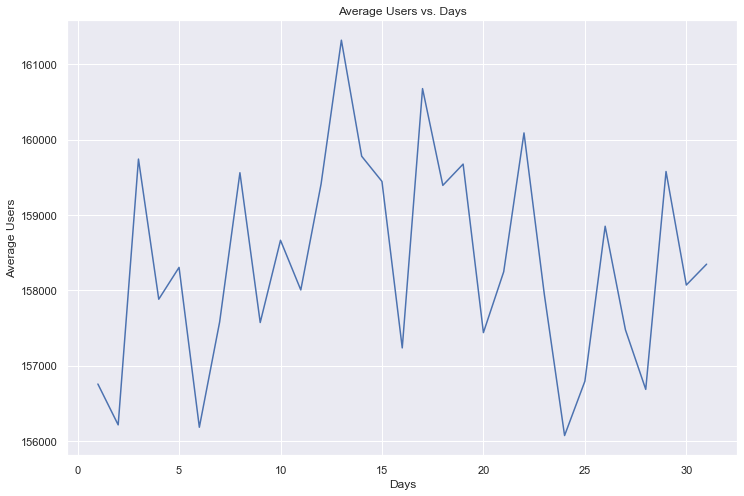

In [40]:
average_user = merged_df.groupby('Day')['Users'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_user.index, average_user.values)

plt.xlabel('Days')
plt.ylabel('Average Users')
plt.title('Average Users vs. Days')
plt.show()

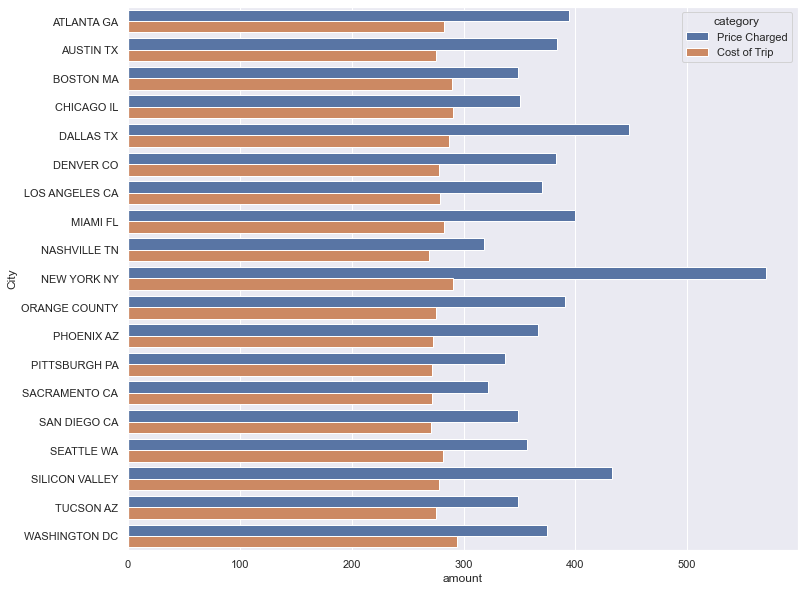

In [41]:
# Assuming 'df' is your DataFrame containing the relevant columns: city, cost, and profit
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

#Group the data by cities and calculate the sum of cost and profit
city_data = merged_df.groupby('City')[['Price Charged', 'Cost of Trip']].mean().reset_index()

#Melt the DataFrame to convert it into long format
melted_data = city_data.melt(id_vars='City', var_name='category', value_name='amount')

# Plot the stacked bar chart
sns.barplot(data=melted_data, x='amount', y='City', hue='category', orient='horizontal')

plt.show()


# Hypothesis Testing


### Hypothesis 1: Is there any significant difference between the profit made by the two companies?

In [42]:

# Separating the profit values for each company

Profit_Margin_Pink = merged_df[merged_df['Company'] == 'Pink Cab']['Profit']
Profit_Margin_Yellow = merged_df[merged_df['Company'] == 'Yellow Cab']['Profit']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(Profit_Margin_Pink, Profit_Margin_Yellow)
print("The Test statistics is",t_statistic," and the p value is",p_value)
# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference between the profit made by pink cab and yellow cab.")
else:
    print("There is no significant difference between the profit made by pink cab and yellow cab.")

The Test statistics is -160.3715175947807  and the p value is 0.0
There is a significant difference between the profit made by pink cab and yellow cab.


In [43]:
#Checking the mean difference and the company that make the higest profit
# Calculate the mean profit for each company
mean_profit_Pink = Profit_Margin_Pink.mean()
mean_profit_Yellow = Profit_Margin_Yellow.mean()

# Compare the mean profits
if mean_profit_Pink > mean_profit_Yellow:
    print("Pink cab makes the most profit.")
else:
    print("Yellow cab  makes the most profit.")

Yellow cab  makes the most profit.


### Hypothesis 2:  Is there any significant difference between methods of payment by revenue generated?

In [44]:
# Separating the profit values for each company

Revenue_Cash = merged_df[merged_df['Payment_Mode'] == 'Card']['Price Charged']
Revenue_Card = merged_df[merged_df['Payment_Mode'] == 'Cash']['Price Charged']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(Revenue_Cash, Revenue_Card)
print("The Test statistics is",t_statistic," and the p value is",p_value)
# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference between the revenue generated by card and cash method of payment.")
else:
    print("There is no significant difference between the revenue generated by card and cash method of payment.")

The Test statistics is -0.1357757352564265  and the p value is 0.8919986499030284
There is no significant difference between the revenue generated by card and cash method of payment.


### Hypothesis 3:  Is there any relationship between cities' population and the profit made?

In [45]:
# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(merged_df['Population'], merged_df['Profit'])
print("The correlation coefficient is",correlation_coefficient," and the p value is",p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant relationship between the  cities' population and the profit made.")
    if correlation_coefficient > 0:
        print("The correlation is positive, indicating a direct relationship.")
    else:
        print("The correlation is negative, indicating an inverse relationship.")
else:
    print("There is no significant relationship between the cities' population and the profit made.")

The correlation coefficient is 0.5440785836878613  and the p value is 0.0
There is a significant relationship between the  cities' population and the profit made.
The correlation is positive, indicating a direct relationship.


### Hypothesis 4:  Is there any relationship between the kilometer covered by the two companies?

In [46]:

# Separating the profit values for each company

KM_Travelled_Pink = merged_df[merged_df['Company'] == 'Pink Cab']['KM Travelled']
KM_Travelled_Yellow = merged_df[merged_df['Company'] == 'Yellow Cab']['KM Travelled']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(KM_Travelled_Pink, KM_Travelled_Yellow)
print("The Test statistics is",t_statistic," and the p value is",p_value)
# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference between KM travelled by pink cab and yellow cab.")
else:
    print("There is no significant difference between KM travelled by pink cab and yellow cab.")

The Test statistics is -0.19967531052842344  and the p value is 0.8417346372229664
There is no significant difference between KM travelled by pink cab and yellow cab.


### Hypothesis 5: Is there any significant difference in the price charged by cities?

In [47]:
# Create separate dataframes for each city
city_data = []
for city in merged_df['City'].unique():
    city_data.append(merged_df[merged_df['City'] == city]['Price Charged'])

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*city_data)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in the price charged by the 19 cities.")
else:
    print("There is no significant difference in the price charged by the 19 cities.")




There is a significant difference in the price charged by the 19 cities.


In [48]:
# Create the object for performing multiple comparisons
comp = mc.MultiComparison(merged_df['Price Charged'], merged_df['City'])

# Perform the Tukey's HSD test
results = comp.tukeyhsd()

# Print the summary of the test results
print(results.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------
    ATLANTA GA      AUSTIN TX  -10.9651 0.6696  -27.6156    5.6854  False
    ATLANTA GA      BOSTON MA  -45.4611  0.001  -57.1547  -33.7675   True
    ATLANTA GA     CHICAGO IL  -43.9698  0.001  -55.0849  -32.8547   True
    ATLANTA GA      DALLAS TX   53.4626  0.001   38.4165   68.5087   True
    ATLANTA GA      DENVER CO  -12.0072 0.6507  -30.0168    6.0024  False
    ATLANTA GA LOS ANGELES CA  -23.8809  0.001  -35.1124  -12.6494   True
    ATLANTA GA       MIAMI FL    5.4047    0.9    -9.978   20.7873  False
    ATLANTA GA   NASHVILLE TN  -75.7278  0.001  -95.2894  -56.1662   True
    ATLANTA GA    NEW YORK NY   175.828  0.001     165.0   186.656   True
    ATLANTA GA  ORANGE COUNTY   -3.8929    0.9  -21.6653   13.8794  False
    ATLANTA GA     PHOENIX AZ  -27.758

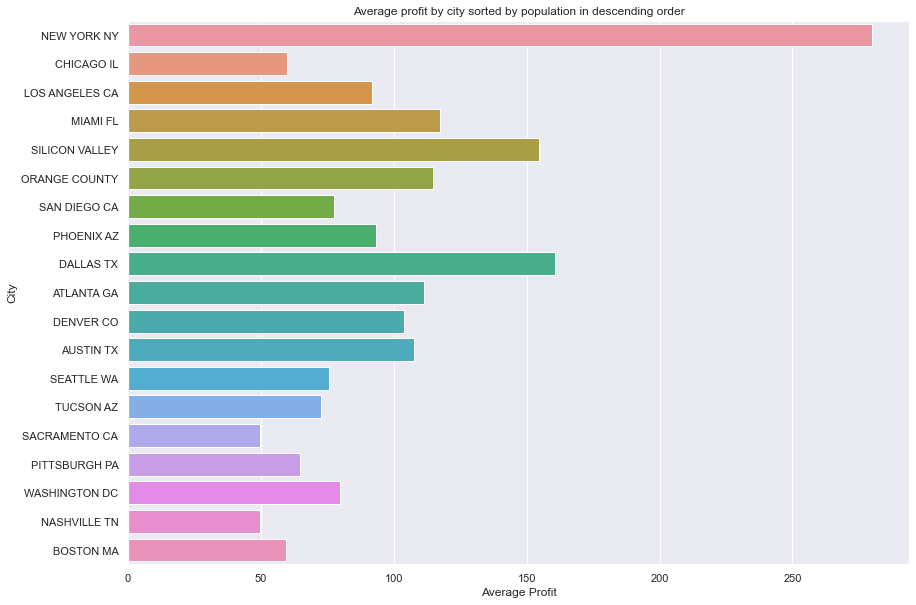

In [49]:

# Calculate average profit and population by city

average_profit_population = merged_df.groupby('City')[['Profit', 'Population']].mean().reset_index()

# Sort the DataFrame by population in descending order
average_profit_population_sorted = average_profit_population.sort_values('Population', ascending=False)

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
plt.title('Average profit by city sorted by population in descending order')
sns.barplot(data=average_profit_population_sorted, x='Profit', y='City', orient='horizontal')

# Adjust the axis labels
plt.xlabel('Average Profit')
plt.ylabel('City')

# Show the plot
plt.show()

### Hypothesis 6: Is there any significant difference in the profit generated accross year?

In [50]:
# Extract the year from the 'date' column
merged_df['year'] = merged_df['Date of Travel'].dt.year

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(merged_df['Profit'], merged_df['year'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in the profit generated across years.")
else:
    print("There is no significant difference in the profit generated across years.")

There is a significant difference in the profit generated across years.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  2016   2017  -0.9277 0.3402  -2.4777   0.6223  False
  2016   2018 -23.7152  0.001 -25.2793 -22.1511   True
  2017   2018 -22.7875  0.001  -24.281  -21.294   True
------------------------------------------------------


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


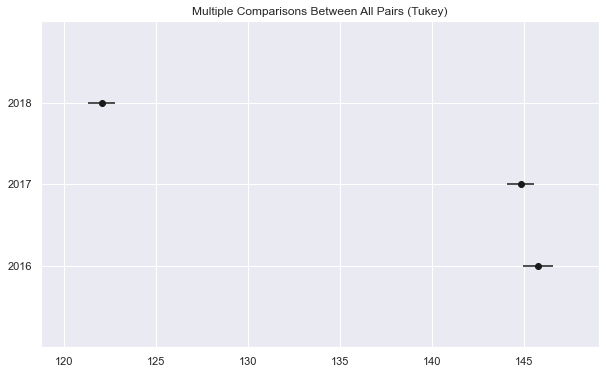

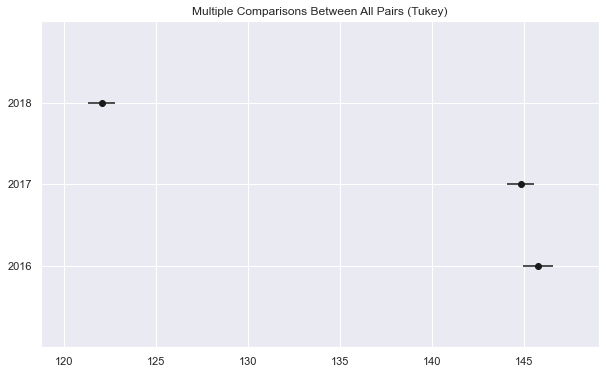

In [51]:

#Perform the one-way ANOVA
model = ols('Profit ~ year', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Perform the Tukey HSD test
tukey_result = pairwise_tukeyhsd(merged_df['Profit'], merged_df['year'])

# Print the Tukey HSD test results
print(tukey_result)

# Plot the Tukey HSD test results
tukey_result.plot_simultaneous()

### What is the yearly trend of the profit margin?

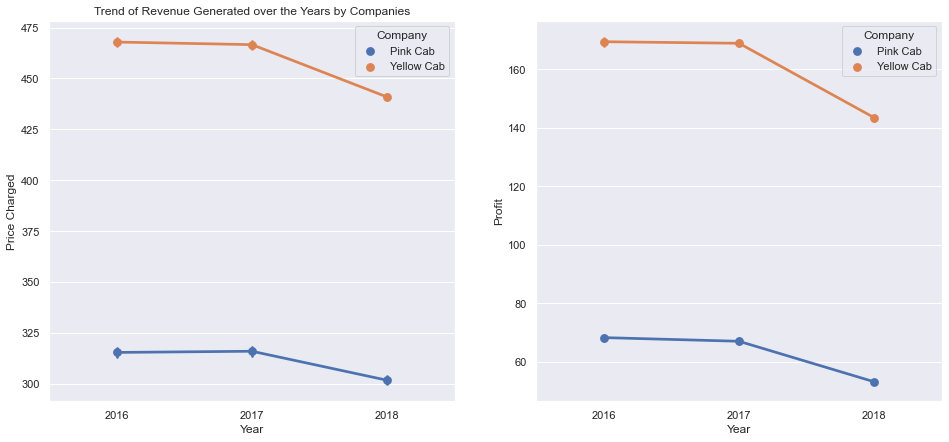

In [52]:
# Plot the trend of revenue generated over the years for each company
plt.figure(figsize=(16, 7))

plt.subplot(1,2,1)
sns.pointplot(data=merged_df, x='year', y='Price Charged', hue='Company')

# Set the x-axis label
plt.xlabel('Year')

# Set the title of the graph
plt.title('Trend of Revenue Generated over the Years by Companies')

plt.subplot(1,2,2)
sns.pointplot(data=merged_df, x='year', y='Profit', hue='Company')

# Set the x-axis label
plt.xlabel('Year')


# Show the legend
plt.legend(title='Company')

# Display the graph
plt.show()

# Conclusion
<!-- This is a comment -->
From the above visualization and hypothesis testing, the following conclusion was drawn:
* Yellow cab has a higher number of customers and transactions compared to the pink cab
* The distribution by Gender shows that male uses cab than female and most customers pay by card.
* The profit made is mostly determined by the price charge and the yellow cab charged higher than the pink cab
* Most sales and profit was made in the first half of the year, the weather might be a contributing factor to this
* There is a positive relationship between the profit made and the population of the cities, the higher the population the more the profit made.
* The price charged by the two cab companies is determined by the location(cities)
* There is a significant difference in the profit and revenue generated across the year, there was a great reduction in 2018 compared to 2016 and 2017.

In [71]:
merged_df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Month,Year,Day,year,Age Category
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885,24701,57.3150,1,2016,8,2016,25-35
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885,24701,281.2772,7,2018,21,2018,25-35
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885,24701,194.6480,11,2018,23,2018,25-35
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885,24701,23.6660,1,2016,6,2016,25-35
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885,24701,253.9808,4,2018,21,2018,25-35
